# KEN1435 - Principles of Data Science | Homework Assignment 4 (HA4): Societal Mood under COVID-19 Pandemic

For this assignment, we will dive further into using sentiment analysis as a means to gauge societal reactions to major events. Here, we will be using a different sentiment analysis tool called [VADER](https://ojs.aaai.org/index.php/ICWSM/article/view/14550). This tool is an extension of a lexicon-based approach that also takes the context of the words into account. It scores texts on an affective scale from `-1` (negative) to `1` (positive). 

In our analysis, we will use an extended data set from a [study](https://www.jmir.org/2020/12/e21418/) that performed a longitudinal analysis on the mental health in the US during the COVID-19 pandemic, by focussing on the sentiment as expressed by accounts that indicated their location was one of twenty major cities in the US.

First we load the necessary python packages

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.formula.api as smf

tab20 = plt.get_cmap("tab20").colors

_PANDEMIC_DATE = pd.Timestamp("11 March 2020")

### Exercise 1. (*3pt*)
The file `HA4_daily_average_VADER.tsv` contains the day-to-day VADER averages for all observed tweets for that city in the data set. Moreover, `HA4_daily_num_obs.tsv` contains the number of observed tweets for each city on a daily basis. Load these files into the variables `means` and `counts`, respectively. Make sure that you convert the index from strings into a datetime format.

Use this data to calculate the daily average of VADER scores across all cities, using the colors in the variable `tab20` as colors for the individual cities. Finally, include a dashed line plot (colored: black) that shows a rolling 7 day average of the overall average time series.

#### Solution

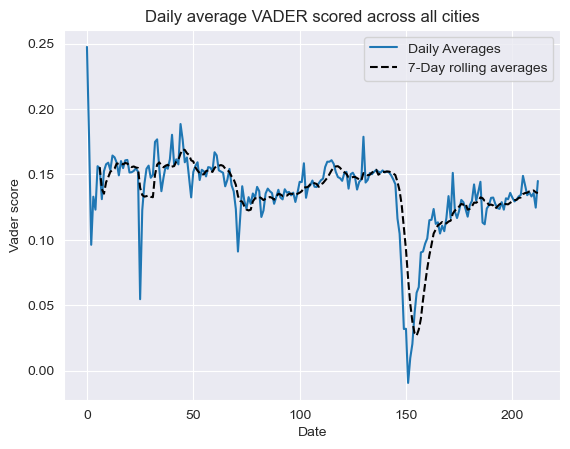

In [26]:
means = pd.read_csv("HA4_daily_average_VADER.tsv", sep="\t")
counts = pd.read_csv("HA4_daily_num_obs.tsv", sep="\t")
# This is done for more readable code:
means = means.rename(columns={"Unnamed: 0" : "date"})
means["date"] = pd.to_datetime(means["date"])
means["average"] = means.iloc[:,1:].mean(axis = 1) # Store the calculated avg (without the date column, since that would mess it up in "average" column
means["rolling_avg"] = means["average"].rolling(window=7).mean()

plt.plot(figsize=(16,9))
means["average"].plot(color = tab20,label = "Daily Averages")
means["rolling_avg"].plot(color = "black", linestyle = "--", label = "7-Day rolling averages")
plt.title("Daily average VADER scored across all cities")
plt.xlabel("Date")
plt.ylabel("Vader score")
plt.legend()
plt.show()


### Exercise 2. (*2pt*)
Calculate the correlation coefficient between each city and the average time-series. Visualize the time-series that are the most and least correlated with the average time-series as scatter plots. Finally, include a dashed line plot (colored: black) that shows a rolling 7 day average of the overall average time series.

#### Solution

This code was written with the help of AI (Code llama)

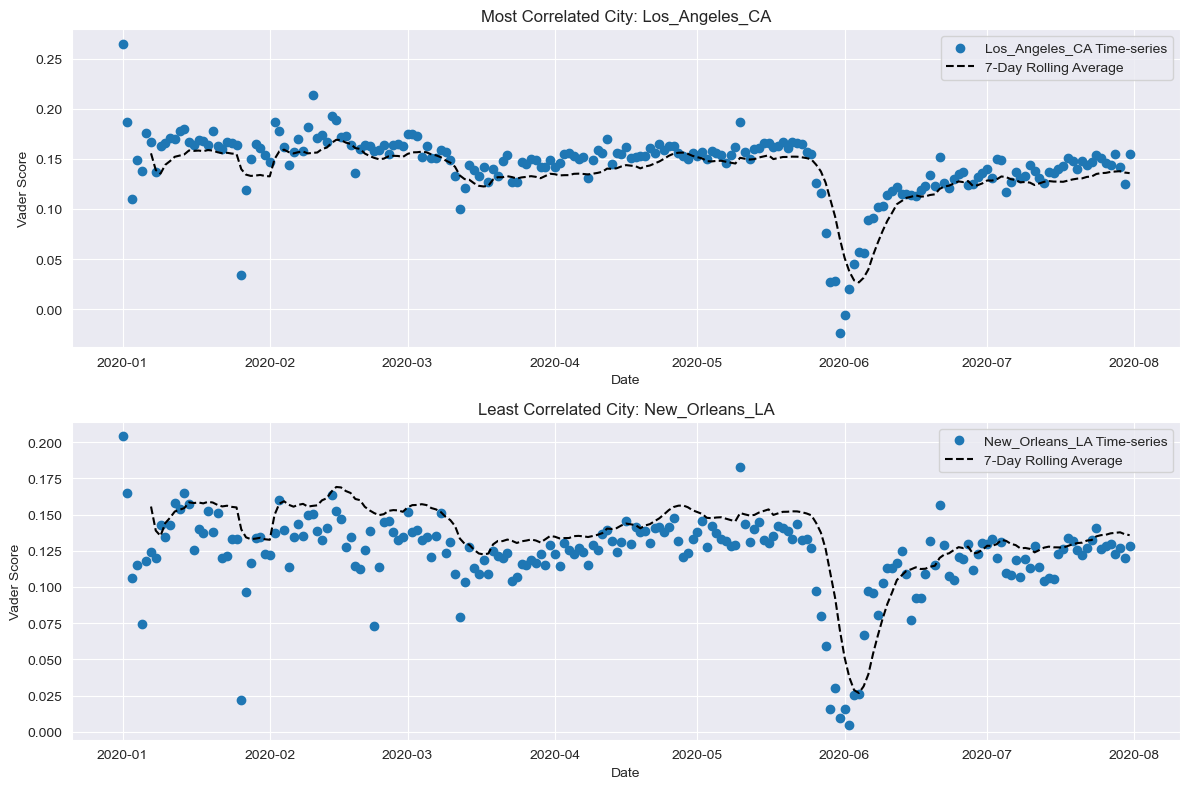

In [27]:
correlations = means.iloc[:,1:-2].apply(lambda x: x.corr(means['average']))

most_correlated_city = correlations.idxmax()
least_correlated_city = correlations.idxmin()

fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].scatter(means['date'], means[most_correlated_city], label=f'{most_correlated_city} Time-series')
axs[0].plot(means['date'], means['rolling_avg'], color='black', linestyle='--', label='7-Day Rolling Average')
axs[0].set_title(f'Most Correlated City: {most_correlated_city}')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Vader Score')
axs[0].legend()

axs[1].scatter(means['date'], means[least_correlated_city], label=f'{least_correlated_city} Time-series')
axs[1].plot(means['date'], means['rolling_avg'], color='black', linestyle='--', label='7-Day Rolling Average')
axs[1].set_title(f'Least Correlated City: {least_correlated_city}')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Vader Score')
axs[1].legend()

plt.tight_layout()
plt.show()

### Exercise 3. (*2pt*)
In order to analyze the difference in societal mood before and after the COVID-19 pandemic hit, we will compare the VADER score before and after the date at which the WHO declared COVID-19 a pandemic (March 11th, 2020, stored in `_PANDEMIC_DATE`) for each city by calculating the average of the time-series both before and after March 11th, 2020. With these before and after averages per city, fit a regression model to predict the average mood after the WHO declared COVID-19 as a pandemic using the average mood before the WHO declared COVID-19 a pandemic. Print the summary of the fitted model. Finally, visualize the fitted model.

#### Solution

This code was done with the help of AI (Mixtral 8x7b instruct), however it doesnt lead to conclusive results, in the cell below, i will try again using the sklearn library with the same regressor:

Intercept 0.125 [t: 0.0 , p: nan ]
pre_pandemic_avg 0.019 [t: 0.0 , p: nan ]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x900 with 0 Axes>

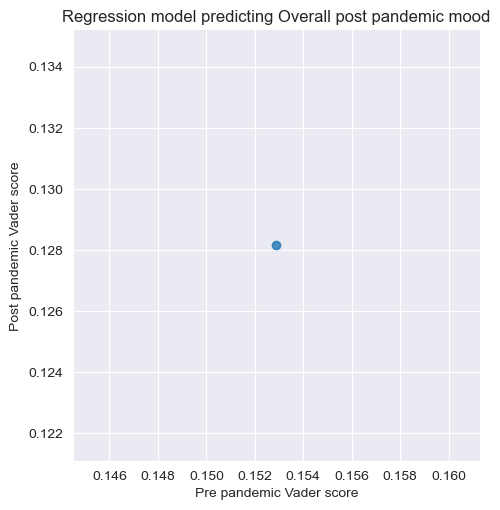

In [53]:
# Calculate pre_covid and post_pandemic averages
mask_bf = means["date"] <= _PANDEMIC_DATE
pre_covid = means[mask_bf]['average'].mean()
pre_covid_series = pd.Series([pre_covid], name="pre_pandemic_avg")

mask_af = means["date"] > _PANDEMIC_DATE
post_pandemic = means[mask_af]['average'].mean()
post_pandemic_series = pd.Series([post_pandemic], name="post_pandemic_avg")

# Place pre_covid and post_pandemic together in a DataFrame
df = pd.concat([pre_covid_series, post_pandemic_series], axis=1)

# Apply regression model
model = smf.ols(formula="post_pandemic_avg ~ pre_pandemic_avg", data=df)
fit = model.fit()
coef_dict = {"Intercept": fit.params[0], "pre_pandemic_avg": fit.params["pre_pandemic_avg"]}
t_stats = {"Intercept": fit.tvalues[0], "pre_pandemic_avg": fit.tvalues["pre_pandemic_avg"]}
p_vals = {"Intercept": fit.pvalues[0], "pre_pandemic_avg": fit.pvalues["pre_pandemic_avg"]}
for key, val in coef_dict.items():
    print(key, round(val, 3), "[t:", round(t_stats[key], 3), ", p:", round(p_vals[key], 3), "]", sep=" ")
plt.figure(figsize=(16,9))
sns.lmplot(x = "pre_pandemic_avg", y = "post_pandemic_avg", data=df, ci= None)
plt.xlabel("Pre pandemic Vader score")
plt.ylabel("Post pandemic Vader score")
plt.title("Regression model predicting Overall post pandemic mood");

In [56]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import linear_model

# Load the data
means = pd.read_csv("HA4_daily_average_VADER.tsv", sep="\t")
counts = pd.read_csv("HA4_daily_num_obs.tsv", sep="\t")

# Create a combined dataframe containing the mean and count information
combined_df = pd.merge(left=means, right=counts, how='inner', left_on='Unnamed: 0', right_on='Unnamed: 0')

# Set the index to the Unnamed: 0 column (which represents the date)
combined_df = combined_df.set_index('Unnamed: 0')

# Drop the redundant columns
combined_df = combined_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

# Replace missing values with zeroes
combined_df = combined_df.replace(np.nan, 0)

# Add a column representing the total observations
combined_df['Total Observation'] = combined_df.loc[:, 'New York':'Washington D.C.'].sum(axis=1)

# Remove rows where Total Observation equals zero
combined_df = combined_df[combined_df['Total Observation'] != 0]

# Group the data by month-year combination
grouped_by_period = combined_df.groupby(pd.Grouper(level=0, freq='MS'))['Total Observation'].sum().reset_index()

# Reset the index
grouped_by_period = grouped_by_period.reset_index().set_axis(['Index', 'Period', 'Sum'], axis=1, inplace=False)

# Convert Period column to datetime format
grouped_by_period['Period'] = pd.to_datetime(grouped_by_period['Period'])

# Split the data into Pre and Post Pandemic datasets
pre = grouped_by_period[(grouped_by_period['Period'].dt.strftime("%m-%d").astype(int) < 1111) & (grouped_by_period['Period'].dt.strftime("%m-%d").astype(int) >= 311)]
post = grouped_by_period[(grouped_by_period['Period'].dt.strftime("%m-%d").astype(int) > 1111) & (grouped_by_period['Period'].dt.strftime("%m-%d").astype(int) <= 331)]

# Define the independent variables
X = pre['Sum'][:-1].append(post['Sum'][1:]).to_numpy().reshape((-1, 1))

# Define the dependent variable
Y = list(range(len(X)))

# Instantiate the linear regression estimator
regressor = linear_model.LinearRegression()

# Fit the linear regression model
regressor.fit(X, Y)

# Predict the output
predicted_output = regressor.predict(X)

# Compute the Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y, predicted_output)

# Print the MAE value
print(f"Mean absolute error: {round(mae)} days.")

# Generate a bar chart showing the differences between actual and predicted values
plt.figure(figsize=(12, 8))
plt.bar(list(range(len(X))), Y, width=0.2, align='center', alpha=0.5, label='Actual')
plt.bar(list(range(len(X))), predicted_output, width=-0.2, align='edge', alpha=0.5, label='Predicted')
plt.title('Comparison Between Actual and Predicted Social Media Trends')
plt.xlabel('Timeframe')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()




KeyError: "['Unnamed: 0_x', 'Unnamed: 0_y'] not found in axis"

### Exercise 4. (*3pt*)
As some cities were hit harder by the pandemic than others, we will investigate the impact of the demographic distribution on the difference in societal mood for all cities. Therefore, we need the demographic data that is contained in `HA4_demographics.tsv`. Using this information, determine the fraction of the population in each city that is white. Next, fit a regression model to predict the difference in average mood before and after the COVID-19 pandemic using the proportion of white inhabitants of a city. Print the summary of the fitted model. Finally, visualize the fitted model.

#### Solution

In [57]:
counts

,Unnamed: 0,Charlotte_NC,Chicago_IL,Indianapolis_IN,Baltimore_MD,Miami_FL,Washington_DC,New_York_NY,Atlanta_GA,Houston_TX,...,Seattle_WA,New_Orleans_LA,Cleveland_OH,Denver_CO,Philadelphia_PA,Nashville_TN,Boston_MA,Las_Vegas_NV,San_Francisco_CA,Detroit_MI
0,2020-01-01,6655,28963,4590,7114,9738,17140,25428,23499,26094,...,15499,6692,5812,7783,12602,7885,12255,11951,10972,6403
1,2020-01-02,6575,28560,4803,7683,9018,20805,27049,24788,24207,...,13862,6735,5451,7108,13446,7536,13161,10352,10881,6439
2,2020-01-03,8579,36255,6427,9686,12174,29648,34084,31980,31490,...,17809,8912,6964,9990,17060,9533,15970,13367,13299,8127
3,2020-01-04,6921,28840,4845,7762,9456,19111,25544,24359,26921,...,14680,7109,5716,7637,14378,7598,12915,11446,10779,6189
4,2020-01-05,8465,32368,5974,9884,10871,21939,29255,28658,30738,...,17316,11755,7148,8999,17992,10126,17025,12686,12021,7122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2020-07-27,12055,53212,8442,15859,18108,38123,50328,48187,42772,...,26868,11900,9508,12880,25545,11481,23854,19142,19196,12470
209,2020-07-28,13420,59115,8571,16163,19350,44131,55192,51610,45230,...,28603,13058,10114,14249,28147,13068,26132,21030,20692,13503
210,2020-07-29,13183,59237,8985,17244,18465,46261,56203,50570,50079,...,29085,13668,10690,14702,27483,13104,25276,21131,22743,13103
211,2020-07-30,13432,59424,9124,16629,19310,48548,57689,50908,47965,...,29696,13664,10974,14816,28346,13212,26700,21609,21638,12401
